/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


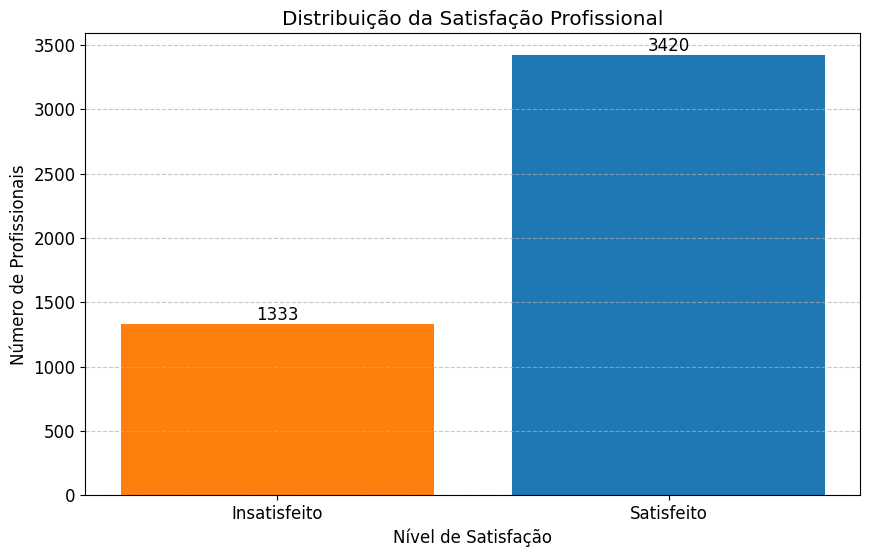

<ipython-input-6-b3cab8e1936b>:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([exp_insatisfeitos.dropna(), exp_satisfeitos.dropna()],


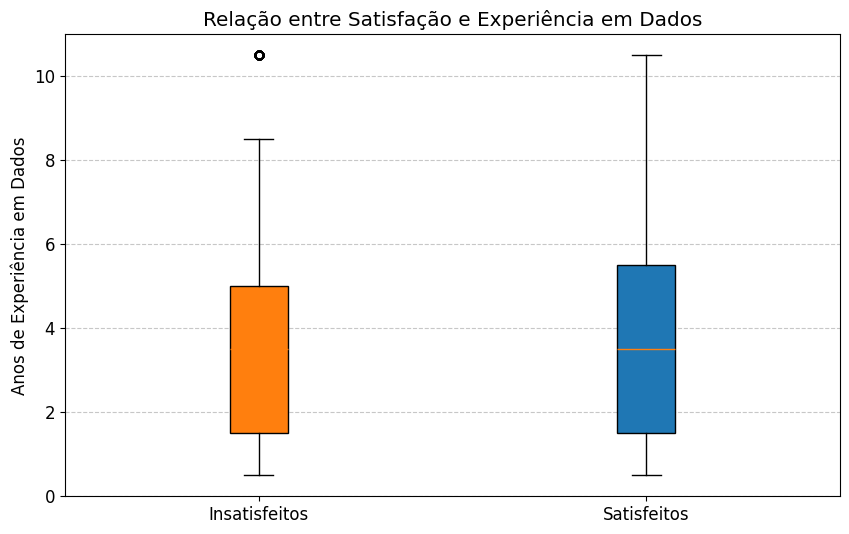

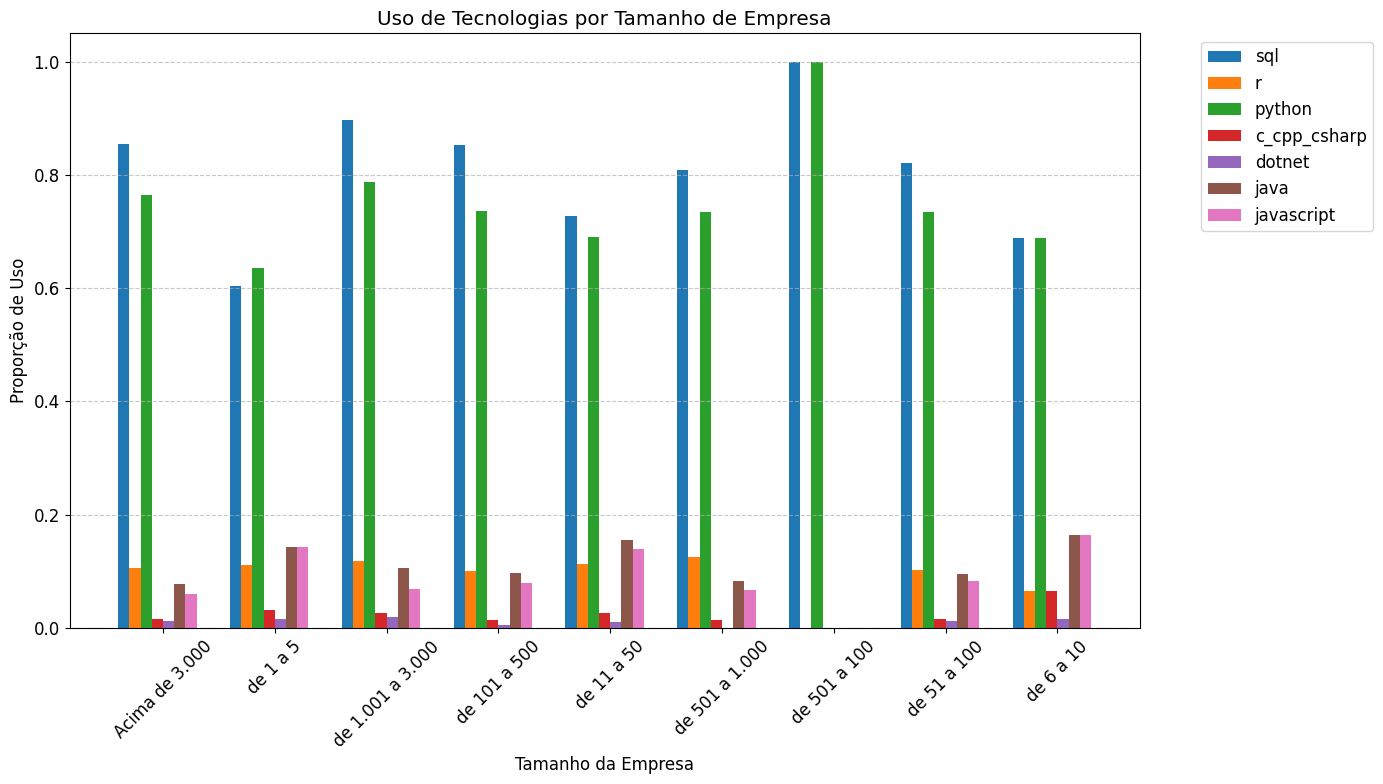

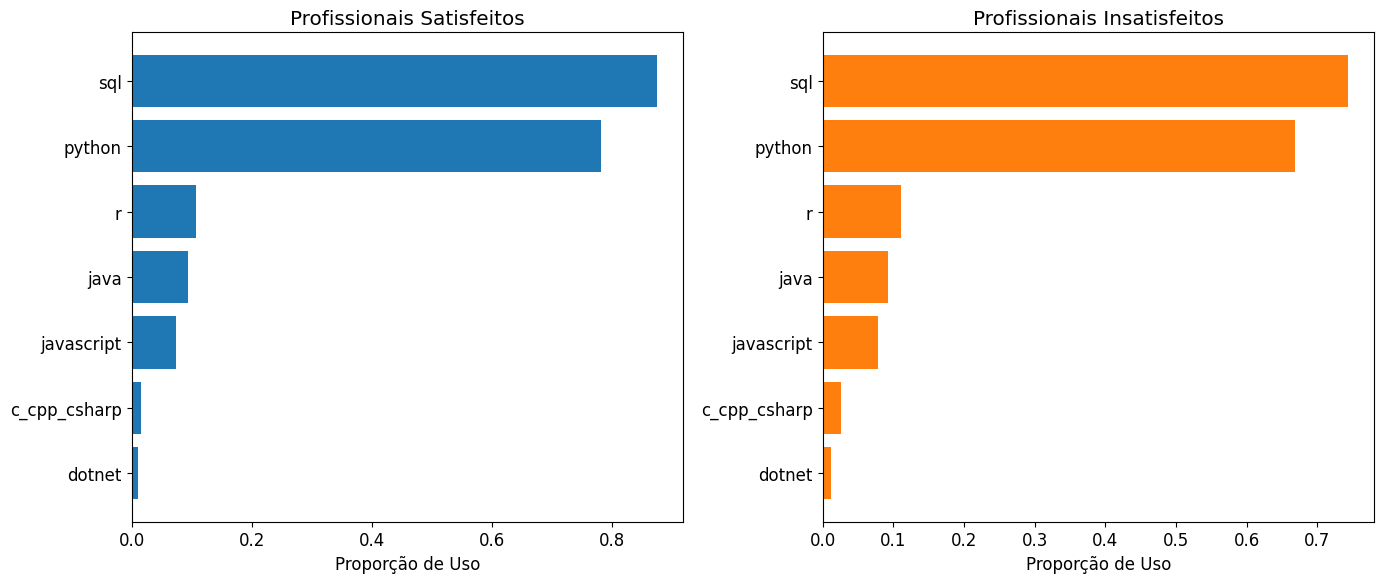

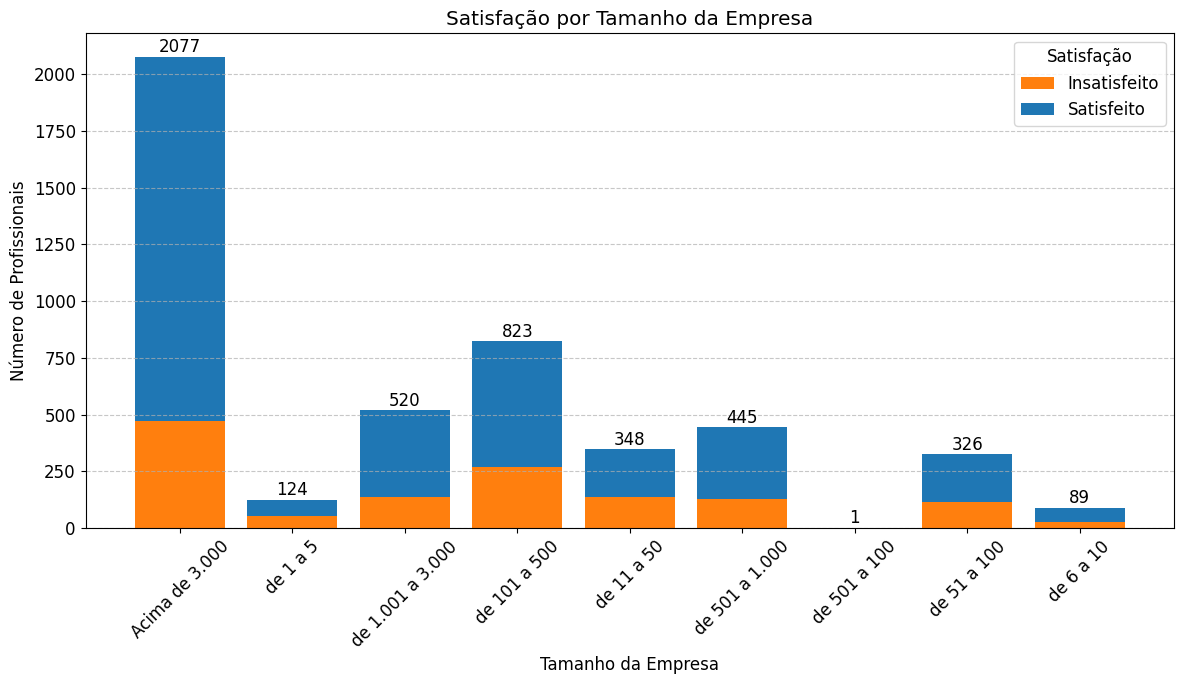

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('Juncao_de_Dados.csv')

# Configurações de estilo
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


# Função para converter faixas salariais em valores numéricos
def parse_salary(s):
    if pd.isna(s) or "não informado" in str(s).lower() or "prefiro não informar" in str(s).lower():
        return np.nan
    try:
        numbers = [float(x.replace('R$', '').replace('.', '').strip())
                 for x in s.split('a') if x.strip().replace('.', '').isdigit()]
        return np.mean(numbers) if numbers else np.nan
    except:
        return np.nan

df['salario_medio'] = df['faixa_salarial'].apply(parse_salary)

# Função para converter experiência em valores numéricos
def parse_exp(exp):
    if pd.isna(exp):
        return np.nan
    exp = str(exp).lower()
    if 'menos de 1' in exp:
        return 0.5
    if 'mais de 10' in exp:
        return 10.5
    numbers = [float(s) for s in exp.split() if s.isdigit()]
    if 'a' in exp:
        return np.mean(numbers)
    return numbers[0] if numbers else np.nan

df['exp_dados_num'] = df['exp_dados'].apply(parse_exp)

# Gráfico 1: Distribuição da Satisfação
plt.figure()
satisfacao_counts = df['satisfacao'].value_counts().sort_index()
bars = plt.bar(satisfacao_counts.index, satisfacao_counts.values,
               color=['#ff7f0e', '#1f77b4'])
plt.title('Distribuição da Satisfação Profissional')
plt.xlabel('Nível de Satisfação')
plt.ylabel('Número de Profissionais')
plt.xticks([0, 1], ['Insatisfeito', 'Satisfeito'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure()
exp_satisfeitos = df[df['satisfacao'] == 1]['exp_dados_num']
exp_insatisfeitos = df[df['satisfacao'] == 0]['exp_dados_num']

box = plt.boxplot([exp_insatisfeitos.dropna(), exp_satisfeitos.dropna()],
                 patch_artist=True,
                 labels=['Insatisfeitos', 'Satisfeitos'])

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Relação entre Satisfação e Experiência em Dados')
plt.ylabel('Anos de Experiência em Dados')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


tech_columns = ['sql', 'r', 'python', 'c_cpp_csharp', 'dotnet', 'java', 'javascript']
tech_by_size = df.groupby('tamanho_empresa')[tech_columns].mean()

plt.figure(figsize=(14, 8))
n_groups = len(tech_by_size)
n_tech = len(tech_columns)
index = np.arange(n_groups)
bar_width = 0.1

for i, tech in enumerate(tech_columns):
    plt.bar(index + i*bar_width, tech_by_size[tech], bar_width, label=tech)

plt.title('Uso de Tecnologias por Tamanho de Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Proporção de Uso')
plt.xticks(index + bar_width*(n_tech/2), tech_by_size.index, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

lang_satisfied = df[df['satisfacao'] == 1][tech_columns].mean().sort_values()
lang_unsatisfied = df[df['satisfacao'] == 0][tech_columns].mean().sort_values()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(lang_satisfied.index, lang_satisfied.values, color='#1f77b4')
plt.title('Profissionais Satisfeitos')
plt.xlabel('Proporção de Uso')

plt.subplot(1, 2, 2)
plt.barh(lang_unsatisfied.index, lang_unsatisfied.values, color='#ff7f0e')
plt.title('Profissionais Insatisfeitos')
plt.xlabel('Proporção de Uso')

plt.tight_layout()
plt.show()


tamanho_counts = df.groupby(['tamanho_empresa', 'satisfacao']).size().unstack().fillna(0)

plt.figure(figsize=(12, 7))
colors = ['#ff7f0e', '#1f77b4']
labels = ['Insatisfeito', 'Satisfeito']
bottom = np.zeros(len(tamanho_counts))

for i, col in enumerate(tamanho_counts.columns):
    plt.bar(tamanho_counts.index, tamanho_counts[col],
            bottom=bottom, label=labels[i], color=colors[i])
    bottom += tamanho_counts[col]

plt.title('Satisfação por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Profissionais')
plt.legend(title='Satisfação', loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, total in enumerate(bottom):
    plt.text(i, total + 2, f'{int(total)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


